### Proof of concept.
####  [Click me I am math!](https://math.stackexchange.com/a/974358)

In [3]:
import numpy as np

def get_inverse_sigma(s, shape):
    sigma = np.zeros(shape).T
    for i in range(len(s)):
        sigma[i][i] = 1/s[i]
    return sigma

def svd_least_squares(A,b):
    u, s, vt = np.linalg.svd(A)
    sInv = get_inverse_sigma(s, A.shape)
    x = np.matmul(np.matmul(np.matmul(vt.T, sInv),u.T), b)
    return x

def apply_inverse_sigma(s, A, rows):
    res = np.array(A[:rows])
    for i, singular_value in enumerate(s):
        res[i] = res[i] / singular_value
    return res

def svd_least_squares_cheaper(A,b):
    u, s, vt = np.linalg.svd(A)
    A_cols = A.shape[1]
    # print('sInv_ut_b {}'.format(apply_inverse_sigma(s, u.T).shape))
    sInv_ut = apply_inverse_sigma(s, u.T, A_cols)
    x = np.matmul(np.matmul(vt.T, sInv_ut), b)
    return x

In [4]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1,1, 0],
              [0,-1, 0],
              [-1,0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])


x = svd_least_squares_cheaper(A,b)



In [95]:
import numpy as np

def load_cpp_matrix(mat_name):
    mat_path = "./debug_matrices/{}.mat".format(mat_name)
    file = open(mat_path, "r") 
    rows = int(file.readline())
    cols = int(file.readline())
    mat = np.empty((rows,cols))
    k = 0
    while True:
        number = file.readline()
        if number == '':
            break
        i = k // cols
        j = k % cols
        mat[i][j] = float(number)    
        k += 1
    return mat

def save_matrix_to_cpp(matrix, mat_name):
    mat_path = "./debug_matrices/{}.mat".format(mat_name)
    file = open(mat_path, "w") 
    if len(matrix.shape) == 1:
        matrix = matrix.reshape(-1,1)
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    file.write('{}\n'.format(rows))
    file.write('{}\n'.format(cols))

    for i in range(rows):
        for j in range(cols):
            file.write('{}\n'.format(matrix[i][j]))


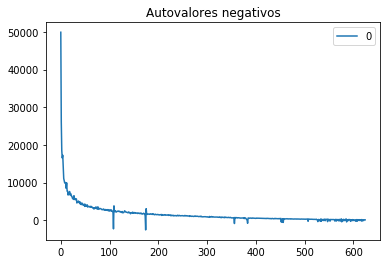

In [75]:
%matplotlib inline
from matplotlib import pyplot 
import pandas as pd

loaded_s = load_cpp_matrix("s")

pd.DataFrame(loaded_s).plot(title="Autovalores negativos")
pyplot.savefig('./ugly_eigenvals.png')



In [94]:
from numpy.linalg import eig
loaded_ata = load_cpp_matrix("ata")

s_py, v_py = eig(loaded_ata)
save_matrix_to_cpp(s_py, "s_py")
save_matrix_to_cpp(v_py, "v_py")

In [78]:
differences = [loaded_lambda - numpy_lambda for loaded_lambda, numpy_lambda in zip(loaded_s, s_py)]
differences

[array([0.03490839]),
 array([167.16774607]),
 array([20.85175192]),
 array([-188.11321539]),
 array([1919.17150686]),
 array([595.13213083]),
 array([-44.27889373]),
 array([-401.15023617]),
 array([-679.47199178]),
 array([-314.45441245]),
 array([-185.60279054]),
 array([-617.43944897]),
 array([1519.6492632]),
 array([-253.05739683]),
 array([-203.96793092]),
 array([-1152.99982871]),
 array([-328.74561194]),
 array([-352.65193146]),
 array([302.16102441]),
 array([-344.45841286]),
 array([437.51908452]),
 array([252.12241287]),
 array([35.72623478]),
 array([42.60934322]),
 array([-431.05857085]),
 array([-260.51454941]),
 array([-484.0423587]),
 array([682.17323323]),
 array([-287.34174364]),
 array([108.75983141]),
 array([257.76358358]),
 array([40.0610171]),
 array([356.78040261]),
 array([-563.97932522]),
 array([-270.1436535]),
 array([-273.81254838]),
 array([227.99533551]),
 array([138.80106833]),
 array([-179.83249365]),
 array([196.77837607]),
 array([-345.72488305]),
 a

In [8]:
from numpy.linalg import solve

ne_x = solve(np.matmul(A.T, A), np.matmul(A.T, b))

ne_x - x

array([-2.22044605e-16,  2.22044605e-16,  0.00000000e+00])

In [12]:
# Verificar que el residuo es ortogonal a las columnas de la matriz A.
residuo = b - np.matmul(A, x)
np.matmul(A.T, residuo) # multiplicar al resultado por las columnas deberia dar cerca de cero


array([-6.66133815e-16,  8.88178420e-16, -2.22044605e-16])